In [93]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

In [2]:
file=open("mindbigdata.txt","r")
data=[]

In [3]:
for line in file.readlines():
    data.append(line.replace("\t",",").split(","))

In [4]:
eeg=pd.DataFrame(data)

In [5]:
eeg=eeg.dropna(axis=1)

In [6]:
EEG=eeg.drop(eeg.columns[[0,1,2,5]],axis='columns')

In [7]:
pd.set_option('display.max_colwidth', -1)
EEG.head(1500)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,3,4,6,7,8,9,10,11,12,13,...,132,133,134,135,136,137,138,139,140,141
0,AF3,6,4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,...,4373.333333,4370.769230,4376.923076,4382.564102,4384.615384,4386.666666,4384.102564,4380.512820,4375.897435,4371.282051
1,F7,6,4489.230769,4475.384615,4474.358974,4486.666666,4498.974358,4496.410256,4486.666666,4489.743589,...,4489.743589,4487.179487,4494.871794,4502.564102,4511.282051,4514.871794,4505.641025,4499.487179,4504.102564,4507.692307
2,F3,6,4538.461538,4528.717948,4524.615384,4526.153846,4532.307692,4538.461538,4535.384615,4528.205128,...,4511.794871,4516.923076,4524.102564,4528.717948,4530.769230,4526.153846,4520.000000,4518.974358,4516.410256,4509.743589
3,FC5,6,4207.692307,4205.641025,4200.512820,4194.358974,4198.461538,4213.846153,4219.487179,4210.769230,...,4210.256410,4207.179487,4210.769230,4214.358974,4215.384615,4216.923076,4216.923076,4213.333333,4204.102564,4199.487179
4,T7,6,4497.948717,4498.461538,4494.871794,4497.948717,4506.153846,4508.205128,4501.538461,4497.435897,...,4507.179487,4508.205128,4507.692307,4506.666666,4511.794871,4514.871794,4512.307692,4509.230769,4503.589743,4499.487179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,F4,7,4660.000000,4657.948717,4657.435897,4662.051282,4663.589743,4654.358974,4651.282051,4663.076923,...,4654.871794,4661.025641,4661.538461,4650.256410,4644.615384,4648.205128,4649.743589,4653.333333,4660.512820,4663.589743
1496,F8,7,3994.871795,3992.307693,3990.256411,3991.282052,3988.717949,3984.102565,3986.153847,3991.282052,...,4013.846153,4014.871794,4006.666666,4002.564102,4004.102564,4000.000000,3997.435898,4006.666666,4017.435897,4017.435897
1497,AF4,7,4071.794871,4068.205128,4062.564102,4061.025641,4062.564102,4056.410256,4053.333333,4061.025641,...,4057.435897,4065.128205,4065.128205,4060.000000,4059.487179,4054.871794,4051.794871,4057.435897,4062.051282,4062.564102
1498,AF3,5,4378.974358,4381.538461,4378.974358,4377.948717,4374.871794,4373.846153,4379.487179,4383.076923,...,4382.564102,4388.717948,4384.615384,4371.794871,4371.794871,4380.000000,4376.410256,4374.871794,4375.897435,4369.230769


In [8]:
#번호별로 data 분리
EEG_0=EEG[EEG[4].isin(['0'])]
EEG_1=EEG[EEG[4].isin(['1'])]
EEG_2=EEG[EEG[4].isin(['2'])]
EEG_3=EEG[EEG[4].isin(['3'])]
EEG_4=EEG[EEG[4].isin(['4'])]
EEG_5=EEG[EEG[4].isin(['5'])]
EEG_6=EEG[EEG[4].isin(['6'])]
EEG_7=EEG[EEG[4].isin(['7'])]
EEG_8=EEG[EEG[4].isin(['8'])]
EEG_9=EEG[EEG[4].isin(['9'])]
EEG__1=EEG[EEG[4].isin(['-1'])]

In [59]:
eeg_0=pd.DataFrame(EEG_0.values)
eeg_1=pd.DataFrame(EEG_1.values)
eeg_2=pd.DataFrame(EEG_2.values)
eeg_3=pd.DataFrame(EEG_3.values)
eeg_4=pd.DataFrame(EEG_4.values)
eeg_5=pd.DataFrame(EEG_5.values)
eeg_6=pd.DataFrame(EEG_6.values)
eeg_7=pd.DataFrame(EEG_7.values)
eeg_8=pd.DataFrame(EEG_8.values)
eeg_9=pd.DataFrame(EEG_9.values)
eeg__1=pd.DataFrame(EEG__1.values)

In [60]:
eeg_0=eeg_0.drop(eeg_0.columns[[0,1]],axis='columns')
eeg_1=eeg_1.drop(eeg_1.columns[[0,1]],axis='columns')
eeg_2=eeg_2.drop(eeg_2.columns[[0,1]],axis='columns')
eeg_3=eeg_3.drop(eeg_3.columns[[0,1]],axis='columns')
eeg_4=eeg_4.drop(eeg_4.columns[[0,1]],axis='columns')
eeg_5=eeg_5.drop(eeg_5.columns[[0,1]],axis='columns')
eeg_6=eeg_6.drop(eeg_6.columns[[0,1]],axis='columns')
eeg_7=eeg_7.drop(eeg_7.columns[[0,1]],axis='columns')
eeg_8=eeg_8.drop(eeg_8.columns[[0,1]],axis='columns')
eeg_9=eeg_9.drop(eeg_9.columns[[0,1]],axis='columns')
eeg__1=eeg__1.drop(eeg__1.columns[[0,1]],axis='columns')

In [61]:
eeg_0=eeg_0.values
eeg_1=eeg_1.values
eeg_2=eeg_2.values
eeg_3=eeg_3.values
eeg_4=eeg_4.values
eeg_5=eeg_5.values
eeg_6=eeg_6.values
eeg_7=eeg_7.values
eeg_8=eeg_8.values
eeg_9=eeg_9.values
eeg__1=eeg__1.values

In [62]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
eeg_0[:]=scaler.fit_transform(eeg_0[:])
eeg_1[:]=scaler.fit_transform(eeg_1[:])
eeg_2[:]=scaler.fit_transform(eeg_2[:])
eeg_3[:]=scaler.fit_transform(eeg_3[:])
eeg_4[:]=scaler.fit_transform(eeg_4[:])
eeg_5[:]=scaler.fit_transform(eeg_5[:])
eeg_6[:]=scaler.fit_transform(eeg_6[:])
eeg_7[:]=scaler.fit_transform(eeg_7[:])
eeg_8[:]=scaler.fit_transform(eeg_8[:])
eeg_9[:]=scaler.fit_transform(eeg_9[:])
eeg__1[:]=scaler.fit_transform(eeg__1[:])

In [63]:
eeg_0=eeg_0.reshape(-1,14,136)
eeg_1=eeg_1.reshape(-1,14,136)
eeg_2=eeg_2.reshape(-1,14,136)
eeg_3=eeg_3.reshape(-1,14,136)
eeg_4=eeg_4.reshape(-1,14,136)
eeg_5=eeg_5.reshape(-1,14,136)
eeg_6=eeg_6.reshape(-1,14,136)
eeg_7=eeg_7.reshape(-1,14,136)
eeg_8=eeg_8.reshape(-1,14,136)
eeg_9=eeg_9.reshape(-1,14,136)
eeg__1=eeg__1.reshape(-1,14,136)

In [64]:
def convertT(eeg) :
    data=[]
    for i in range(len(eeg)) :
        data.append(eeg[i].T)
    data=np.asarray(data)
    return data

In [65]:
eeg_0=convertT(eeg_0)
eeg_1=convertT(eeg_1)
eeg_2=convertT(eeg_2)
eeg_3=convertT(eeg_3)
eeg_4=convertT(eeg_4)
eeg_5=convertT(eeg_5)
eeg_6=convertT(eeg_6)
eeg_7=convertT(eeg_7)
eeg_8=convertT(eeg_8)
eeg_9=convertT(eeg_9)
eeg__1=convertT(eeg__1)

In [82]:
print(eeg_0.shape,eeg_1.shape,eeg_2.shape,eeg_3.shape,eeg_4.shape,eeg_5.shape,eeg_6.shape,eeg_7.shape,eeg_8.shape,eeg_9.shape,eeg__1.shape)

(6516, 136, 14) (6351, 136, 14) (6495, 136, 14) (6618, 136, 14) (6349, 136, 14) (6571, 136, 14) (6523, 136, 14) (6337, 136, 14) (6552, 136, 14) (6563, 136, 14) (159, 136, 14)


In [84]:
label_0=np.zeros((6516,1))
label_1=np.ones((6351,1))
label_2=np.full((6495,1),2)
label_3=np.full((6618,1),2)
label_4=np.full((6349,1),2)
label_5=np.full((6571,1),2)
label_6=np.full((6523,1),2)
label_7=np.full((6337,1),2)
label_8=np.full((6552,1),2)
label_9=np.full((6563,1),2)
label__1=np.full((159,1),-1)

In [85]:
data=np.r_[eeg_0,eeg_1]
data=np.r_[data,eeg_2]
data=np.r_[data,eeg_3]
data=np.r_[data,eeg_4]
data=np.r_[data,eeg_5]
data=np.r_[data,eeg_6]
data=np.r_[data,eeg_7]
data=np.r_[data,eeg_8]
data=np.r_[data,eeg_9]
data=np.r_[data,eeg__1]
print(data.shape)

(65034, 136, 14)


In [142]:
from PIL import Image
img = Image.fromarray(data[0], 'RGB')
img.save('my.png')
img.show()

In [86]:
label=np.r_[label_0,label_1]
label=np.r_[label,label_2]
label=np.r_[label,label_3]
label=np.r_[label,label_4]
label=np.r_[label,label_5]
label=np.r_[label,label_6]
label=np.r_[label,label_7]
label=np.r_[label,label_8]
label=np.r_[label,label_9]
label=np.r_[label,label__1]
print(label.shape)

(65034, 1)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=None, shuffle=True, stratify=label)

In [117]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45523, 136, 14, 1) (19511, 136, 14, 1) (45523, 1) (19511, 1)


In [129]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import  BatchNormalization,Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras import optimizers

from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from keras import backend as K

In [130]:
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [119]:
from tensorflow.keras import utils as np_utils
y_train = to_categorical(y_train, 11)
y_test = to_categorical(y_test, 11)
print(y_train.shape, y_test.shape)
pd.DataFrame(y_train).head

(45523, 11) (19511, 11)


<bound method NDFrame.head of          0    1    2    3    4    5    6    7    8    9   10
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
45518  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
45519  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
45520  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
45521  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
45522  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[45523 rows x 11 columns]>

In [131]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(150, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    
    model.add(Dense(11, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy', precision, recall, f1score])

    return model

model = basic_cnn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 136, 14, 50)       250       
_________________________________________________________________
activation_30 (Activation)   (None, 136, 14, 50)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 136, 14, 50)       10050     
_________________________________________________________________
activation_31 (Activation)   (None, 136, 14, 50)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 68, 7, 50)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 68, 7, 50)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 68, 7, 50)        

In [132]:
hist=model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test,y_test))

Train on 45523 samples, validate on 19511 samples
Epoch 1/50
45523/45523 [==============================] - 73s 2ms/step - loss: 0.6507 - accuracy: 0.8013 - precision: 0.8013 - recall: 0.8011 - f1score: 0.8012 - val_loss: 0.6573 - val_accuracy: 0.8022 - val_precision: 0.8023 - val_recall: 0.8023 - val_f1score: 0.8023
Epoch 2/50
45523/45523 [==============================] - 72s 2ms/step - loss: 0.6396 - accuracy: 0.8017 - precision: 0.8016 - recall: 0.8016 - f1score: 0.8016 - val_loss: 0.6344 - val_accuracy: 0.8022 - val_precision: 0.8023 - val_recall: 0.8023 - val_f1score: 0.8023
Epoch 3/50
45523/45523 [==============================] - 72s 2ms/step - loss: 0.6376 - accuracy: 0.8019 - precision: 0.8018 - recall: 0.8018 - f1score: 0.8018 - val_loss: 0.6345 - val_accuracy: 0.8022 - val_precision: 0.8023 - val_recall: 0.8023 - val_f1score: 0.8023
Epoch 4/50
45523/45523 [==============================] - 72s 2ms/step - loss: 0.6353 - accuracy: 0.8021 - precision: 0.8021 - recall: 0.8021 -

45523/45523 [==============================] - 71s 2ms/step - loss: 0.6515 - accuracy: 0.7997 - precision: 0.7997 - recall: 0.7997 - f1score: 0.7997 - val_loss: 0.6513 - val_accuracy: 0.7997 - val_precision: 0.7998 - val_recall: 0.7998 - val_f1score: 0.7998
Epoch 32/50
45523/45523 [==============================] - 72s 2ms/step - loss: 0.6515 - accuracy: 0.7997 - precision: 0.7997 - recall: 0.7997 - f1score: 0.7997 - val_loss: 0.6515 - val_accuracy: 0.7997 - val_precision: 0.7998 - val_recall: 0.7998 - val_f1score: 0.7998
Epoch 33/50
45523/45523 [==============================] - 76s 2ms/step - loss: 0.6515 - accuracy: 0.7997 - precision: 0.7997 - recall: 0.7997 - f1score: 0.7997 - val_loss: 0.6513 - val_accuracy: 0.7997 - val_precision: 0.7998 - val_recall: 0.7998 - val_f1score: 0.7998
Epoch 34/50
45523/45523 [==============================] - 72s 2ms/step - loss: 0.6516 - accuracy: 0.7997 - precision: 0.7997 - recall: 0.7997 - f1score: 0.7997 - val_loss: 0.6512 - val_accuracy: 0.7997

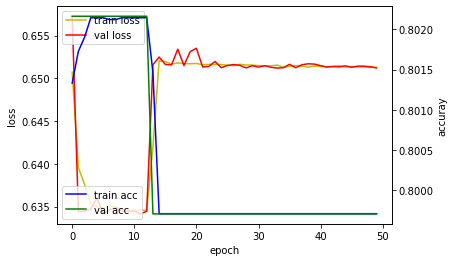

Test accuracy:  [0.6512367025825002, 0.7997027039527893]
19511/19511 [==============================] - 5s 255us/step
loss: 0.651, accuracy: 0.800, precision: 0.800, recall: 0.800, f1score: 0.800


In [133]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results)

_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

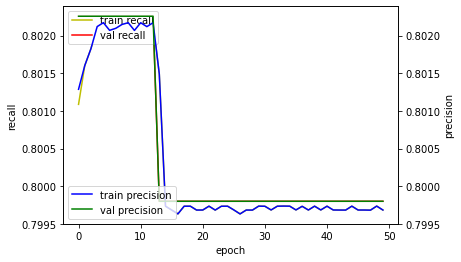

In [137]:
fig, rec_ax = plt.subplots()

pre_ax = rec_ax.twinx()

rec_ax.plot(hist.history['recall'], 'y', label='train recall')
rec_ax.plot(hist.history['val_recall'], 'r', label='val recall')

pre_ax.plot(hist.history['precision'], 'b', label='train precision')
pre_ax.plot(hist.history['val_precision'], 'g', label='val precision')

rec_ax.set_xlabel('epoch')
rec_ax.set_ylabel('recall')
pre_ax.set_ylabel('precision')

rec_ax.legend(loc='upper left')
pre_ax.legend(loc='lower left')

plt.show()